## 3.5 Kernel SVM

## 3.5.0 Executed in Pre-sections 

In [37]:
from sklearn.svm import SVC
from _tools import plot_decision_regions 

In [38]:
# Iris Dataset Import 
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris.data[:,[2,3]]
y = iris.target

print('Class labels:', np.unique(y))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.3, random_state=1, stratify=y)




from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# combine train_std with test_std
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))



Class labels: [0 1 2]


### 3.5.1

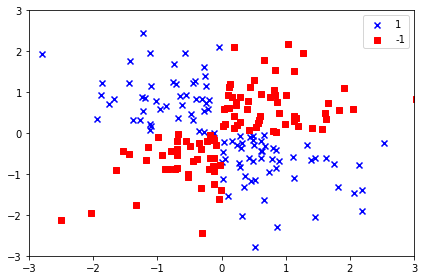

In [39]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor==1,0], X_xor[y_xor==1,1],
          c='b', marker='x',label='1')

plt.scatter(X_xor[y_xor==-1,0], X_xor[y_xor==-1,1],
          c='r', marker='s',label='-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### 3.5.2 

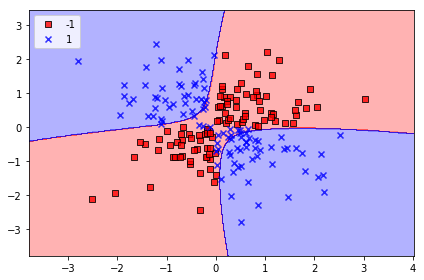

In [40]:
svm = SVC(kernel='rbf',random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [73]:
##  Definie Method
def show_iris_SVC(_kernel,_random_state,_gamma,_C):
    svm = SVC(kernel=_kernel, random_state=_random_state, gamma=_gamma, C=_C)
    svm.fit(X_train_std, y_train)
    plot_decision_regions(X_combined_std, y_combined,classifier=svm,
                         test_idx=range(105,150))
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width  [standardized]')

    # determine rabel position
    plt.legend(loc='upper left')
    plt.title('Iris SVC : kernel=%s, random_state=%s, gamma=%s, C=%s' % (_kernel,_random_state,_gamma,_C))
    plt.tight_layout()
    plt.show()


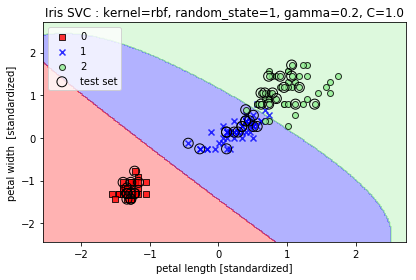

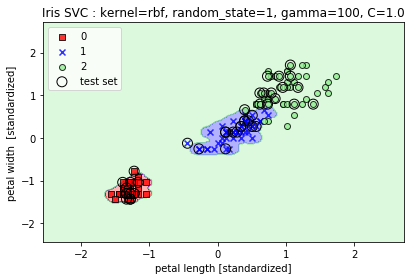

In [74]:
# change gamma
show_iris_SVC('rbf', 1,0.2,1.0)
show_iris_SVC('rbf', 1,100,1.0)